In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as T

In [2]:
# Created modules
import visualization_utils as vu
import train_utils as tu
import model_utils as mu

import imp
imp.reload(mu)
imp.reload(tu)

<module 'train_utils' from '/Users/intanmaharani/Desktop/Semester I August 2022/IF5171 - Pembelajaran Mesin DSAI/Deep Learning/Praktikum_Mandiri/Project1/deliverables/train_utils.py'>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Defining Costants and Helper Function

In [4]:
DATA_DIR = "../data"
MODEL_DIR = "models"

EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
## Create the directory to store the model if not exists
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [6]:
# Plotting Helper Function
def plot_acc_epoch(epochs, train_acc, test_acc):
    l = range(1,epochs+1)
    N = len(l)
    l2 = np.arange(N)
    plt.subplots(figsize=(10, 5))
    plt.plot(l2, test_acc, label="Testing Accuracy")
    plt.plot(l2, train_acc, label="Training Accuracy")
    plt.xticks(l2,l)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title('Accuracy versus Epoch MLP Model', fontsize=12)
    plt.show()

## 1. Dataset Preparation - MNIST for Both Training and Testing

In [7]:
# Load dataset
training_data = datasets.MNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

In [8]:
type(training_data)

torchvision.datasets.mnist.MNIST

In [9]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

Show the MNIST dataset

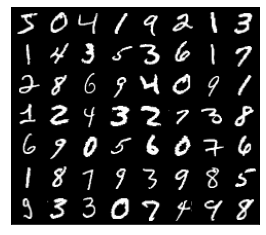

In [10]:
grid_tr = vu.set_grid(train_dataloader.dataset.data, num_cells=56)
vu.show(grid_tr)

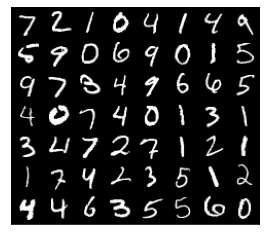

In [11]:
grid_ts = vu.set_grid(test_dataloader.dataset.data, num_cells=56)
vu.show(grid_ts)

In this case study, both training data and test data are from the same domain - MNIST datasets. Therefore, as we can see, both data are quite similar in terms of its representation.

# 2. Modeling

The model that will be used is **MLP** or Multilayer Perceptron. MLP refers to ANN model that has more than 2 layers (i.e., hidden layer(s) in addition to input and output layers).

For the loss/objective function, **Cross Entropy Loss** will be used. This loss function is used mainly because in our training, model weights will be adjusted in every epoch.

For the optimizer, both **Stochastic Gradient Descent (SGD)** and **Adam** will be experimented in the model development. In which, we can see later on which optimizer performs better to predict the given MNIST test set.

### 2.1. Create the model

In [12]:
print(f"Using {DEVICE} device")

# Define model
mlp_sgd = mu.MLP(d_in=28*28, d_out=10)
mlp_sgd = mlp_sgd.to(DEVICE)
print(mlp_sgd)

# Define model
mlp_adam = mu.MLP(d_in=28*28, d_out=10)
mlp_adam = mlp_adam.to(DEVICE)
print(mlp_adam)

# Persistent file to store the model
model_path_sgd = os.path.join(MODEL_DIR, "mlp_mnist_mnist_sgd.pth")
model_path_adam = os.path.join(MODEL_DIR, "mlp_mnist_mnist_adam.pth")

Using cpu device
MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### 2.2. Define the loss function and the optimizers

In [13]:
# Loss function: Cross Entropy Loss or Log Loss
loss_fn = nn.CrossEntropyLoss()

In [15]:
# Optimizer 1: Stochastic Gradient Descent (SGD)
optimizer1 = optim.SGD(
    mlp_sgd.parameters(), 
    lr=LEARNING_RATE
)

In [14]:
# Optimizer 2: Adam
optimizer2 = optim.Adam(
    mlp_adam.parameters(), 
    lr=LEARNING_RATE
)

### 2.3. Execute the training for both experiments
Experiment #1: using SGD as optimizer

Experiment #2: using Adam as optimizer

with **10** epochs for each experiment, **64** batch size, and **0.001** learning rate

#### 2.3.1. Using SGD as optimizer

In [16]:
train_accuracy_sgd = []
test_accuracy_sgd = []
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train(train_dataloader, mlp_sgd, loss_fn, optimizer1)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    print("Test Set Error")
    acc_test = tu.test(test_dataloader, mlp_sgd, loss_fn)
    print("\nTrain Set Error")
    acc_train = tu.test(train_dataloader, mlp_sgd, loss_fn)
    test_accuracy_sgd.append(acc_test)
    train_accuracy_sgd.append(acc_train)
    
    # Save model
    torch.save(mlp_sgd.state_dict(), model_path_sgd)
    print(f"Model {model_path_sgd} stored!")
    
print("Done!")

Epoch 1 out of 10
 ------------
Loss: 2.301872 [    0]/60000
Loss: 2.299610 [ 6400]/60000
Loss: 2.294496 [12800]/60000
Loss: 2.279119 [19200]/60000
Loss: 2.276201 [25600]/60000
Loss: 2.280961 [32000]/60000
Loss: 2.272354 [38400]/60000
Loss: 2.279295 [44800]/60000
Loss: 2.262255 [51200]/60000
Loss: 2.246265 [57600]/60000
 > Training time: 12.54 seconds
Test Set Error
Test Error: 
 Accuracy: 42.5%, Avg loss: 2.253725 


Train Set Error
Test Error: 
 Accuracy: 41.4%, Avg loss: 2.255055 

Model models/mlp_mnist_mnist_sgd.pth stored!
Epoch 2 out of 10
 ------------
Loss: 2.253734 [    0]/60000
Loss: 2.250098 [ 6400]/60000
Loss: 2.254170 [12800]/60000
Loss: 2.213674 [19200]/60000
Loss: 2.225399 [25600]/60000
Loss: 2.229067 [32000]/60000
Loss: 2.209678 [38400]/60000
Loss: 2.230417 [44800]/60000
Loss: 2.199289 [51200]/60000
Loss: 2.175926 [57600]/60000
 > Training time: 12.05 seconds
Test Set Error
Test Error: 
 Accuracy: 62.9%, Avg loss: 2.186250 


Train Set Error
Test Error: 
 Accuracy: 62.

**Experiment #1** result: From the above training and test executions, it can be seen that the accuracy of the MLP model with SGD optimizer (10 epochs, 64 batch size, and 0.001 learning rate) is 84.3% (sometimes changed when re-run).

##### 2.3.1.1. Plotting Training Accuracy vs Test Accuracy

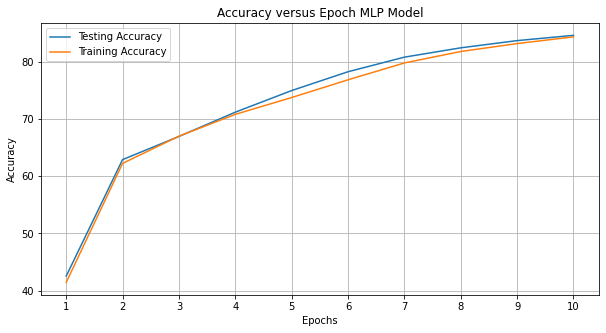

In [17]:
plot_acc_epoch(EPOCHS, train_accuracy_sgd, test_accuracy_sgd)

#### 2.3.2. Using Adam as optimizer

In [18]:
train_accuracy_adam = []
test_accuracy_adam = []
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train(train_dataloader, mlp_adam, loss_fn, optimizer2)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    print("Test Set Error")
    acc_test = tu.test(test_dataloader, mlp_adam, loss_fn)
    print("\nTrain Set Error")
    acc_train = tu.test(train_dataloader, mlp_adam, loss_fn)
    test_accuracy_adam.append(acc_test)
    train_accuracy_adam.append(acc_train)
    
    # Save model
    torch.save(mlp_adam.state_dict(), model_path_adam)
    print(f"Model {model_path_adam} stored!")
    
print("Done!")

Epoch 1 out of 10
 ------------
Loss: 2.301265 [    0]/60000
Loss: 0.260814 [ 6400]/60000
Loss: 0.201424 [12800]/60000
Loss: 0.254508 [19200]/60000
Loss: 0.150031 [25600]/60000
Loss: 0.334021 [32000]/60000
Loss: 0.140171 [38400]/60000
Loss: 0.207712 [44800]/60000
Loss: 0.354904 [51200]/60000
Loss: 0.170567 [57600]/60000
 > Training time: 19.33 seconds
Test Set Error
Test Error: 
 Accuracy: 96.0%, Avg loss: 0.129351 


Train Set Error
Test Error: 
 Accuracy: 96.3%, Avg loss: 0.120792 

Model models/mlp_mnist_mnist_adam.pth stored!
Epoch 2 out of 10
 ------------
Loss: 0.086652 [    0]/60000
Loss: 0.084926 [ 6400]/60000
Loss: 0.124608 [12800]/60000
Loss: 0.118552 [19200]/60000
Loss: 0.052847 [25600]/60000
Loss: 0.139656 [32000]/60000
Loss: 0.059604 [38400]/60000
Loss: 0.130793 [44800]/60000
Loss: 0.172102 [51200]/60000
Loss: 0.114777 [57600]/60000
 > Training time: 20.86 seconds
Test Set Error
Test Error: 
 Accuracy: 96.5%, Avg loss: 0.115945 


Train Set Error
Test Error: 
 Accuracy: 97

**Experiment #2** result: from the above training and testing executions, it can be seen that the accuracy of the MLP model with Adam optimizer (10 epochs, 64 batch size, and 0.001 learning rate) is 98.0%. Much better than using SGD as an optimizer!

##### 2.3.2.1. Plotting Training Accuracy vs Test Accuracy

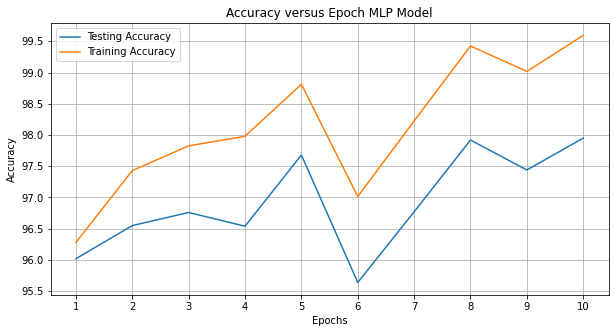

In [19]:
plot_acc_epoch(EPOCHS, train_accuracy_adam, test_accuracy_adam)

From the plot above, it can be seen that MLP using Adam performs better than using SGD, however, it is slightly overfitting to the training data.